In [2]:
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform
import imageio
import seaborn as sns
import matplotlib.animation as animation
import pickle
import glob
import os
import pickle
import plotly.io as pio
import plotly.graph_objects as go
import plotly.express as px
import json
import pandas as pd
import numpy as np
import os
import glob
import os.path
import chart_studio.plotly as py
import plotly.graph_objs as go
from itertools import product
from plotly.subplots import make_subplots
import plotly

In [3]:
# Load Naive Video RDMs for occipital region

          
windowed_eeg_rdm_dict_n_v = {}
with h5py.File("/Users/huseyinelmas/Desktop/CCN-Lab/CCN-RSA/RSA_Results/Naive"+
               "/Video/eegRDMs/eeg_rdm_naive_video_occipital_1_correlation.hdf5", "r") as f:
    attributes = list(f.attrs.items())
    for key in list(f.keys()):
          windowed_eeg_rdm_dict_n_v[tuple(map(int, key[1:-1].split(',')))] = np.asarray(f[key]["rdm"])

stimuli =["robot-drink","robot-grasp","robot-handwave","robot-talk","robot-nudge",
        "robot-paper","robot-turn","robot-wipe","android-drink","android-grasp","android-handwave",
        "android-talk","android-nudge","android-paper","android-turn","android-wipe","human-drink",
        "human-grasp","human-handwave","human-talk","human-nudge","human-paper","human-turn","human-wipe"]

In [4]:
         
windowed_eeg_rdm_dict_p_v = {}
with h5py.File("/Users/huseyinelmas/Desktop/CCN-Lab/CCN-RSA/RSA_Results/Prior"+
               "/Video/eegRDMs/eeg_rdm_prior_video_occipital_1_correlation.hdf5", "r") as f:
    attributes = list(f.attrs.items())
    for key in list(f.keys()):
          windowed_eeg_rdm_dict_p_v[tuple(map(int, key[1:-1].split(',')))] = np.asarray(f[key]["rdm"])

stimuli =["robot-drink","robot-grasp","robot-handwave","robot-talk","robot-nudge",
        "robot-paper","robot-turn","robot-wipe","android-drink","android-grasp","android-handwave",
        "android-talk","android-nudge","android-paper","android-turn","android-wipe","human-drink",
        "human-grasp","human-handwave","human-talk","human-nudge","human-paper","human-turn","human-wipe"]

In [5]:
         
windowed_eeg_rdm_dict_p_s = {}
with h5py.File("/Users/huseyinelmas/Desktop/CCN-Lab/CCN-RSA/RSA_Results/Prior"+
               "/Still/eegRDMs/eeg_rdm_prior_still_occipital_1_correlation.hdf5", "r") as f:
    attributes = list(f.attrs.items())
    for key in list(f.keys()):
          windowed_eeg_rdm_dict_p_s[tuple(map(int, key[1:-1].split(',')))] = np.asarray(f[key]["rdm"])

stimuli =["robot-drink","robot-grasp","robot-handwave","robot-talk","robot-nudge",
        "robot-paper","robot-turn","robot-wipe","android-drink","android-grasp","android-handwave",
        "android-talk","android-nudge","android-paper","android-turn","android-wipe","human-drink",
        "human-grasp","human-handwave","human-talk","human-nudge","human-paper","human-turn","human-wipe"]

In [6]:
# Load Naive Still RDMs for occipital region


windowed_eeg_rdm_dict_n_s = {}
with h5py.File("/Users/huseyinelmas/Desktop/CCN-Lab/CCN-RSA/RSA_Results/Naive"+
               "/Still/eegRDMs/eeg_rdm_naive_still_occipital_1_correlation.hdf5", "r") as f:
    attributes = list(f.attrs.items())
    for key in list(f.keys()):
          windowed_eeg_rdm_dict_n_s[tuple(map(int, key[1:-1].split(',')))] = np.asarray(f[key]["rdm"])
  

In [6]:
def inner(df_sorted):
    start_times=[]
    end_times=[]
    sig_wind_times=[]
    for i in range(df_sorted.shape[0]):
        if(df_sorted.iloc[i:-1, :].shape[0] > 5):
            if(( df_sorted.iloc[i+1].time == df_sorted.iloc[i].time+2) and 
               ( df_sorted.iloc[i+2].time == df_sorted.iloc[i+1].time+2) and
               ( df_sorted.iloc[i+3].time == df_sorted.iloc[i+2].time+2) and
               ( df_sorted.iloc[i+4].time == df_sorted.iloc[i+3].time+2) and
               ( df_sorted.iloc[i-1].time != df_sorted.iloc[i].time-2)):
                start_times.append(df_sorted.iloc[i].time) 
        if(df_sorted.iloc[:i, :].shape[0] > 5):
            if(( df_sorted.iloc[i-1].time == df_sorted.iloc[i].time-2) and 
               ( df_sorted.iloc[i-2].time == df_sorted.iloc[i-1].time-2) and
               ( df_sorted.iloc[i-3].time == df_sorted.iloc[i-2].time-2) and
               ( df_sorted.iloc[i-4].time == df_sorted.iloc[i-3].time-2) and
               (df_sorted.shape[0] <=i+1 or df_sorted.iloc[i+1].time != df_sorted.iloc[i].time+2 )):
                end_times.append(df_sorted.iloc[i].time) 
        
    return start_times, end_times

In [7]:

def find_significant_rdms(df, correct=True):

    pos_corr_rdms =  df[ df.kendall_tau > 0]
    alpha=0.001
    n_test = 1
    if correct:
        n_test = 400
    significant_rdms = pos_corr_rdms[pos_corr_rdms["kendall_p-value"]/2 <= (alpha/n_test)]
    return significant_rdms



In [8]:
def plot_rdm_heatmap(RDM,subject,time_window):
    fig, ax = plt.subplots(figsize=(10,5))
    img=ax.imshow(squareform(RDM), interpolation='nearest')
    ax.set(title='EEG rdm of subject ' + str(subject) + ' at time window ' + str(2*(time_window[0]-100)))    # Used to return the plot as an image rray
    ax.set_xticks(np.arange(len(stimuli)))
    ax.set_yticks(np.arange(len(stimuli)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(stimuli)
    ax.set_yticklabels(stimuli)
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
    fig.colorbar(img)
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    return image


In [1]:

stimuli =["robot-drink","robot-grasp","robot-handwave","robot-talk","robot-nudge",
        "robot-paper","robot-turn","robot-wipe","android-drink","android-grasp","android-handwave",
        "android-talk","android-nudge","android-paper","android-turn","android-wipe","human-drink",
        "human-grasp","human-handwave","human-talk","human-nudge","human-paper","human-turn","human-wipe"]

In [9]:
start_indx = 104/2 + 100
RDM_n_s = np.mean(windowed_eeg_rdm_dict_n_s[(start_indx,start_indx+1)],0)


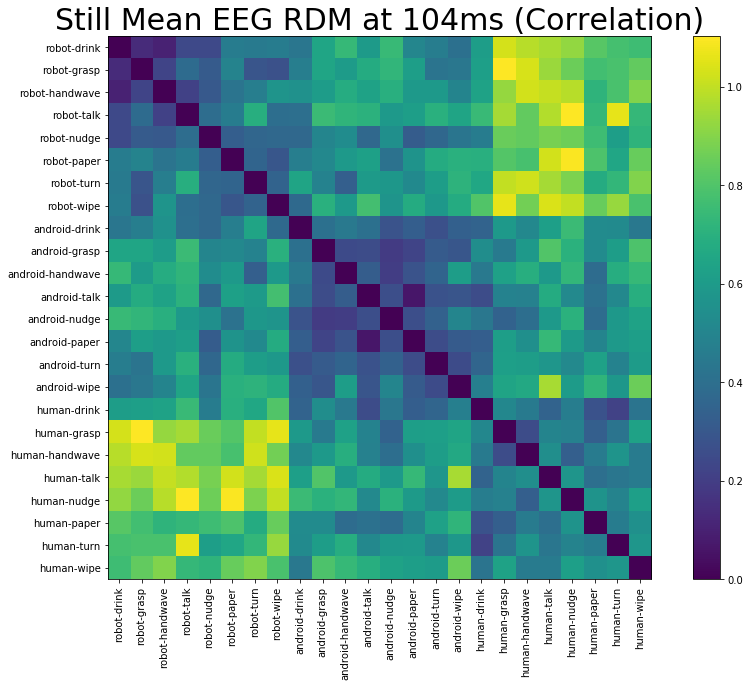

In [13]:
fig, ax = plt.subplots(figsize=(15,10))
plt.title("Still Mean EEG RDM at 104ms (Correlation)",fontsize=30)
im = plt.imshow(squareform(RDM_n_s), interpolation='nearest')
ax.set_xticks(np.arange(len(stimuli)))
ax.set_yticks(np.arange(len(stimuli)))
# ... and label them with the respective list entries
ax.set_xticklabels(stimuli)
ax.set_yticklabels(stimuli)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
fig.colorbar(im)
plt.savefig("Still104_hamming")

In [ ]:
subject=0
kwargs_write = {'fps':4, 'quantizer':'nq'}
name = "still_subject_"+str(subject)+"_EEG_RDM"
imageio.mimsave('./' + name +'.gif', [plot_rdm_heatmap(windowed_eeg_rdm_dict[(start_time,start_time+1)][subject]
                                ,subject, (start_time,start_time+1))
                                 for start_time in range(len(windowed_eeg_rdm_dict.keys()))], fps=4)

In [7]:
# Read pickle
naive_still_path = '/Users/huseyinelmas/Desktop/CCN-Lab/CCN-RSA/RSA_Results/Naive/Still/correlation_hamming_avg_subjects_results.pkl'
naive_video_path = '/Users/huseyinelmas/Desktop/CCN-Lab/CCN-RSA/RSA_Results/Naive/Video/correlation_hamming_avg_subjects_results.pkl'
prior_still_path = '/Users/huseyinelmas/Desktop/CCN-Lab/CCN-RSA/RSA_Results/Prior/Still/correlation_hamming_avg_subjects_results.pkl'
prior_video_path = '/Users/huseyinelmas/Desktop/CCN-Lab/CCN-RSA/RSA_Results/Prior/Video/correlation_hamming_avg_subjects_results.pkl'
#with open(path+electrode_region+'_results.pkl', 'rb') as f: 
#    electrode_models[electrode_region], significant_rdms, eeg_rdm_dist_metric, model_rdm_dist_metric, correct, alpha, el_r = pickle.load(f)
n_s_rdm_statistics_df, eeg_rdm_dist_metric, model_rdm_dist_metric = pd.read_pickle(naive_still_path)
n_v_rdm_statistics_df, eeg_rdm_dist_metric, model_rdm_dist_metric = pd.read_pickle(naive_video_path)
p_s_rdm_statistics_df, eeg_rdm_dist_metric, model_rdm_dist_metric = pd.read_pickle(prior_still_path)
p_v_rdm_statistics_df, eeg_rdm_dist_metric, model_rdm_dist_metric = pd.read_pickle(prior_video_path)
frames = [n_s_rdm_statistics_df, n_v_rdm_statistics_df,p_s_rdm_statistics_df,p_s_rdm_statistics_df,p_v_rdm_statistics_df]
rdm_avg_df = pd.concat(frames)

In [73]:
rdm_avg_df

,experiment_type,stimulus_type,electrode_region,model_name,time,kendall_tau,kendall_p-value
0,naive,still,central,action_intention_hamming,-200,-0.025929,0.599114
12400,naive,still,occipital,action_category_hamming,-200,0.000264,0.995729
4800,naive,still,parietal,action_intention_hamming,-200,0.037410,0.448195
5200,naive,still,parietal,action_category_hamming,-200,-0.028647,0.561395
12000,naive,still,occipital,action_intention_hamming,-200,0.037020,0.452947
5600,naive,still,parietal,action_target_hamming,-200,0.030224,0.516584
2800,naive,still,frontal,action_category_hamming,-200,0.074984,0.128467
800,naive,still,central,action_target_hamming,-200,-0.035153,0.450607
6000,naive,still,parietal,agent_hamming,-200,0.034762,0.480972
6400,naive,still,parietal,biological_appearance_hamming,-200,0.044680,0.365031


In [8]:
rdm_avg_df[(rdm_avg_df.electrode_region == "occipital") &
           (rdm_avg_df.model_name=="agent_hamming") & (rdm_avg_df.stimulus_type=="still")]

,experiment_type,stimulus_type,electrode_region,model_name,time,kendall_tau,kendall_p-value
13200,naive,still,occipital,agent_hamming,-200,0.030316,0.538820
13201,naive,still,occipital,agent_hamming,-198,0.005416,0.912561
13312,naive,still,occipital,agent_hamming,-196,0.029669,0.547515
13423,naive,still,occipital,agent_hamming,-194,0.028456,0.564005
13534,naive,still,occipital,agent_hamming,-192,-0.008973,0.855645
13545,naive,still,occipital,agent_hamming,-190,-0.024899,0.613706
13556,naive,still,occipital,agent_hamming,-188,-0.023444,0.634580
13567,naive,still,occipital,agent_hamming,-186,-0.018351,0.709865
13578,naive,still,occipital,agent_hamming,-184,-0.032822,0.505791
13589,naive,still,occipital,agent_hamming,-182,-0.024010,0.626427


In [15]:
er="occipital"
model="agent_hamming"
start_time=0
# Create mean kendall tau lines for still and video 
df_n_s = rdm_avg_df[(rdm_avg_df.electrode_region == er) & (rdm_avg_df.experiment_type=="naive")&
       (rdm_avg_df.model_name==model) & (rdm_avg_df.stimulus_type=="still")].set_index("time")[["kendall_tau","kendall_p-value"]] 
df_n_v = rdm_avg_df[(rdm_avg_df.electrode_region == er) & (rdm_avg_df.experiment_type=="naive")&
       (rdm_avg_df.model_name==model) & (rdm_avg_df.stimulus_type=="video")].set_index("time")[["kendall_tau","kendall_p-value"]]
df_p_s = rdm_avg_df[(rdm_avg_df.electrode_region == er) & (rdm_avg_df.experiment_type=="prior")&
       (rdm_avg_df.model_name==model) & (rdm_avg_df.stimulus_type=="still")].set_index("time")[["kendall_tau","kendall_p-value"]] 
df_p_v = rdm_avg_df[(rdm_avg_df.electrode_region == er) & (rdm_avg_df.experiment_type=="prior")&
       (rdm_avg_df.model_name==model) & (rdm_avg_df.stimulus_type=="video")].set_index("time")[["kendall_tau","kendall_p-value"]]


# Find significance
pos_corr_n_s = find_significant_rdms(rdm_avg_df[(rdm_avg_df.electrode_region == er) & (rdm_avg_df.experiment_type=="naive")&
       (rdm_avg_df.model_name==model) & (rdm_avg_df.stimulus_type=="still")].sort_values(by="time"))
pos_corr_n_v = find_significant_rdms(rdm_avg_df[(rdm_avg_df.electrode_region == er) & (rdm_avg_df.experiment_type=="naive")&
       (rdm_avg_df.model_name==model) & (rdm_avg_df.stimulus_type=="video")].sort_values(by="time"))
pos_corr_p_s = find_significant_rdms(rdm_avg_df[(rdm_avg_df.electrode_region == er) & (rdm_avg_df.experiment_type=="prior")&
       (rdm_avg_df.model_name==model) & (rdm_avg_df.stimulus_type=="still")].sort_values(by="time"))
pos_corr_p_v = find_significant_rdms(rdm_avg_df[(rdm_avg_df.electrode_region == er) &(rdm_avg_df.experiment_type=="prior")&
       (rdm_avg_df.model_name==model) & (rdm_avg_df.stimulus_type=="video")].sort_values(by="time"))

start_times_ns, end_times_ns = inner(pos_corr_n_s)
start_times_nv, end_times_nv = inner(pos_corr_n_v)
start_times_pv, end_times_pv = inner(pos_corr_p_v)

max_ns_idx =[]
max_nv_idx= []

max_ps_idx =[]
max_pv_idx =[]



# Find max RDMs of these windows for ns
for i,start_time in enumerate(start_times_ns):
    end_time = end_times_ns[i]
    max_ns_idx.append(df_n_s.loc[start_time:end_time, 'kendall_tau'].idxmax())

# Find max RDMs of these windows for nv
for i,start_time in enumerate(start_times_nv):
    end_time = end_times_nv[i]
    max_nv_idx.append(df_n_v.loc[start_time:end_time, 'kendall_tau'].idxmax())

    

In [22]:
start_times_ns


[66, 264]

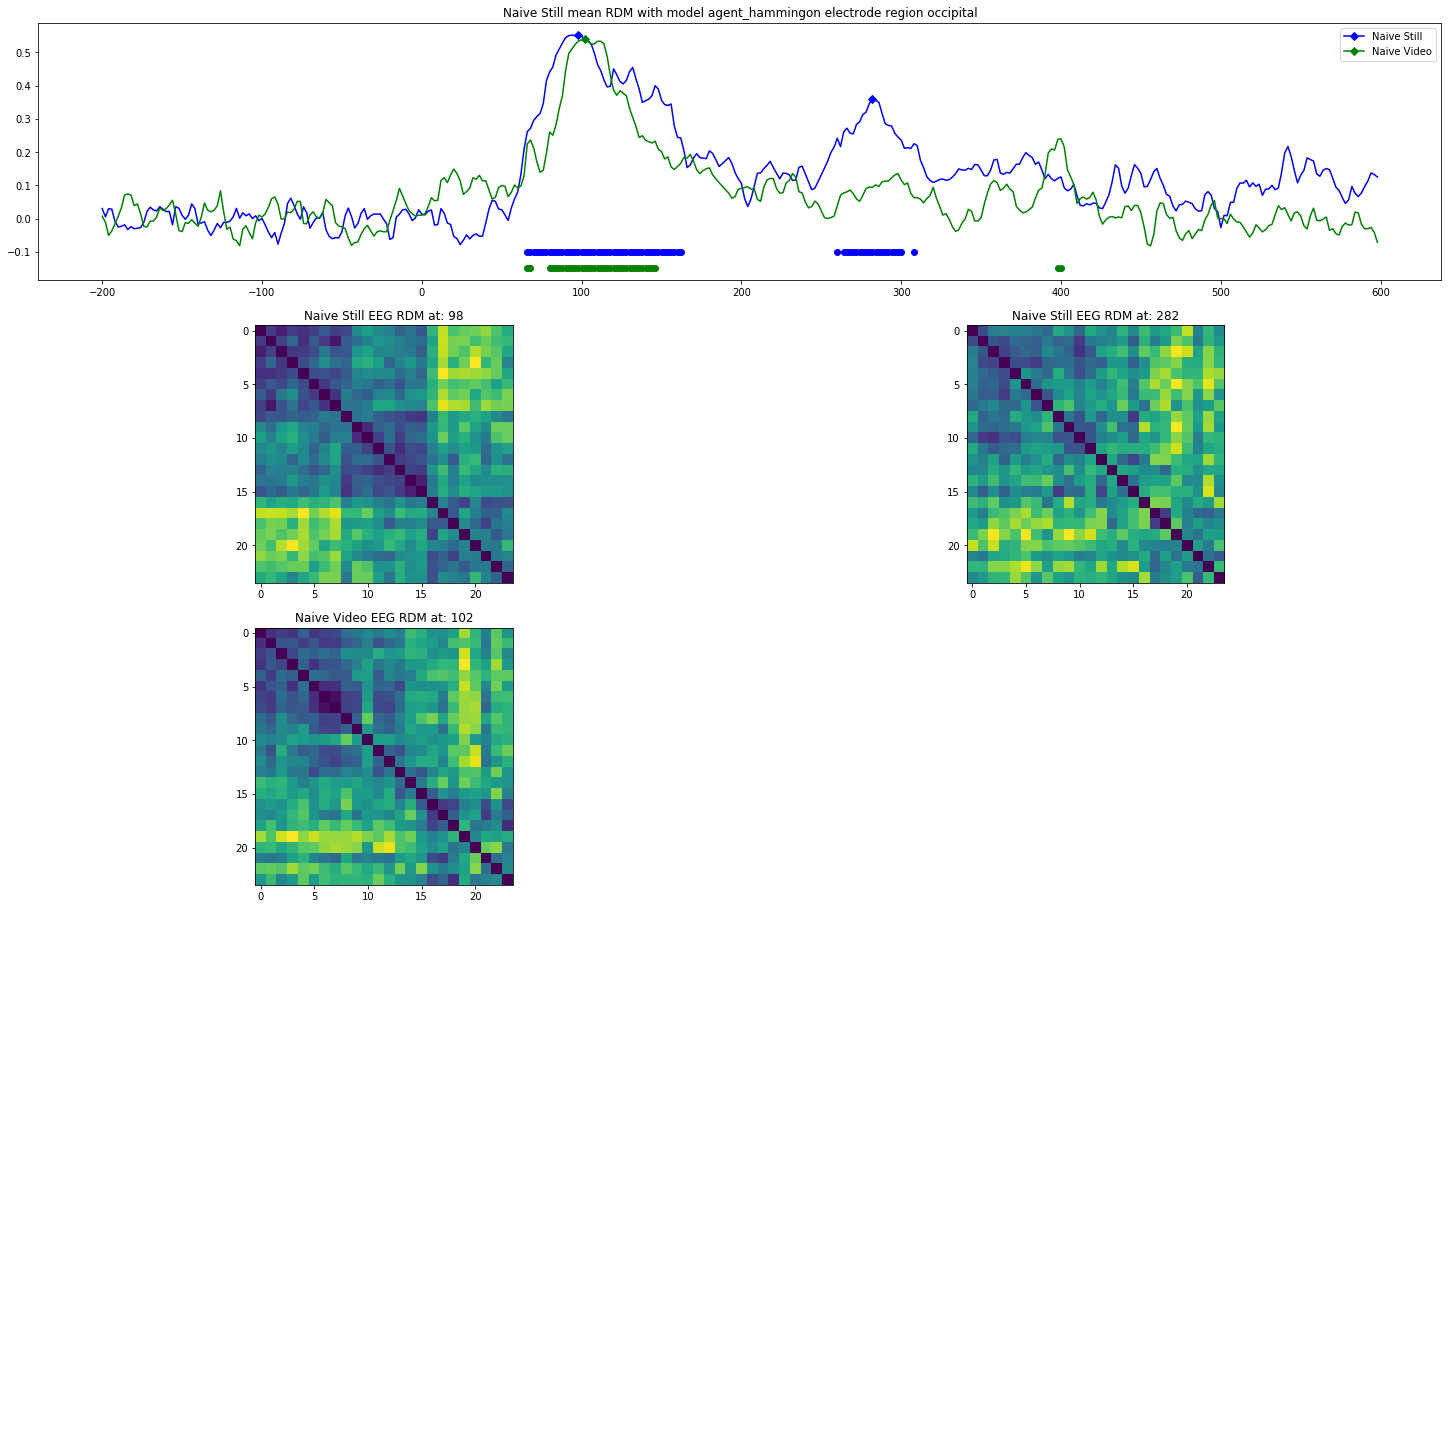

In [17]:

# Calculate Start index from start tie
fig = plt.figure(constrained_layout=True,figsize=(20,20))
gs = fig.add_gridspec(5, max(len(max_nv_idx),len(max_ns_idx),len(max_pv_idx),len(max_pv_idx)))
f_ax1 = fig.add_subplot(gs[0, :])
start_indx = start_time/2 + 100
 
# Mark significcant points
f_ax1.scatter(pos_corr_n_s.time.values.tolist(),[-0.1]*len(pos_corr_n_s.time.values.tolist()),c="b")
f_ax1.scatter(pos_corr_n_v.time.values.tolist(),[-0.15]*len(pos_corr_n_v.time.values.tolist()),c="g")
f_ax1.plot(df_n_s.kendall_tau,'-bD',markevery=[int(x/2+100) for x in max_ns_idx],label="Naive Still")
f_ax1.plot(df_n_v.kendall_tau,'-gD',markevery=[int(x/2+100) for x in max_nv_idx], label="Naive Video")

f_ax1.set_title('Naive Still mean RDM with model ' + model + "on electrode region " + er)
f_ax1.legend()

for i,max_ns_start_time in enumerate(max_ns_idx):
    ax = fig.add_subplot(gs[1, i])
    start_indx = max_ns_start_time/2 + 100
    RDM_n_s = np.mean(windowed_eeg_rdm_dict_n_s[(start_indx,start_indx+1)],0)
    ax.imshow(squareform(RDM_n_s))
    ax.set_title("Naive Still EEG RDM at: " + str(max_ns_start_time))
for i,max_nv_start_time in enumerate(max_nv_idx):
    ax = fig.add_subplot(gs[2, i])
    start_indx = 88/2 + 100
    RDM_n_v = np.mean(windowed_eeg_rdm_dict_n_v[(start_indx,start_indx+1)],0)
    ax.imshow(squareform(RDM_n_v))
    ax.set_title("Naive Video EEG RDM at: " + str(max_nv_start_time))



In [60]:
max_nv_idx

[102, 298]

In [ ]:
plot_RDM_comparison(windowed_eeg_rdm_dict_n_v,windowed_eeg_rdm_dict_n_s,rdm_avg_df,model="",start_time=100)

In [39]:
electrode_region='occipital'
model_name='agent_hamming'

significant_rdms = find_significant_rdms(rdm_avg_df[rdm_avg_df.stimulus_type=="still"])
df = significant_rdms[(significant_rdms.electrode_region == electrode_region) 
                      & (significant_rdms.model_name == model_name) ]




([66, 258], [158, 300])

In [ ]:
rdm_df

Text(0.5, 1.0, 'gs[-1, -2]')

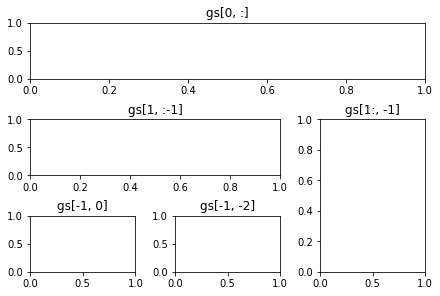

In [61]:
fig3 = plt.figure(constrained_layout=True)
gs = fig3.add_gridspec(3, 3)
f3_ax1 = fig3.add_subplot(gs[0, :])
f3_ax1.set_title('gs[0, :]')
f3_ax2 = fig3.add_subplot(gs[1, :-1])
f3_ax2.set_title('gs[1, :-1]')
f3_ax3 = fig3.add_subplot(gs[1:, -1])
f3_ax3.set_title('gs[1:, -1]')
f3_ax4 = fig3.add_subplot(gs[-1, 0])
f3_ax4.set_title('gs[-1, 0]')
f3_ax5 = fig3.add_subplot(gs[-1, -2])
f3_ax5.set_title('gs[-1, -2]')

In [ ]:
# Mean Still subject RMD gif
subject="mean"
kwargs_write = {'fps':4, 'quantizer':'nq'}
name = "still_"+str(subject)+"_EEG_RDM"
imageio.mimsave('./' + name +'.gif', [plot_rdm_heatmap(np.mean(windowed_eeg_rdm_dict[(start_time,start_time+1)],0)
                                ,subject, (start_time,start_time+1))
                                 for start_time in range(len(windowed_eeg_rdm_dict.keys()))], fps=4)

In [ ]:
# Given path of hdf5 file, returns the windowed eeg_rdm_dict and experiment parameters
windowed_eeg_rdm_dict = {}
with h5py.File("/Users/huseyinelmas/Desktop/CCN-Lab/CCN-RSA/Results/Naive"+
               "/Video/eegRDMs/eeg_rdm_naive_video_occipital_1_correlation.hdf5", "r") as f:
    attributes = list(f.attrs.items())
    for key in list(f.keys()):
          windowed_eeg_rdm_dict[tuple(map(int, key[1:-1].split(',')))] = np.asarray(f[key]["rdm"])



In [ ]:
subject="mean"
kwargs_write = {'fps':4, 'quantizer':'nq'}
name = "video_"+str(subject)+"_EEG_RDM"
imageio.mimsave('./' + name +'.gif', [plot_rdm_heatmap(np.mean(windowed_eeg_rdm_dict[(start_time,start_time+1)],0)
                                ,subject, (start_time,start_time+1))
                                 for start_time in range(len(windowed_eeg_rdm_dict.keys()))], fps=4)

In [ ]:
%matplotlib notebook 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform
from matplotlib import animation
subject="mean"

fig, ax = plt.subplots()
ax.set(title='EEG rdm of subject ' + str(subject) + ' at time window ' + str(2*(time_window[0]-100)))    # Used to return the plot as an image rray
ax.set_xticks(np.arange(len(stimuli)))
ax.set_yticks(np.arange(len(stimuli)))
ax.set_xticklabels(stimuli)
ax.set_yticklabels(stimuli)
im=ax.imshow(squareform(np.mean(windowed_eeg_rdm_dict[(0,1)],0)),interpolation='none')

def init():
    im.set_data(np.random.random((24,24)))
    # ... and label them with the respective list entries


    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
    return [im]

def animate(i):
    start_time=2*(i-100)
    RDM=np.mean(squareform(windowed_eeg_rdm_dict[(start_time,start_time+1)],0))
    im.set_data(RDM=np.mean(windowed_eeg_rdm_dict[(start_time,start_time+1)],0))
    return im
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=400, repeat = False)

In [ ]:
%matplotlib notebook 

from IPython.display import HTML

import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


def animate_heat_map():
    fig = plt.figure()

    nx = ny = 20
    data = np.random.rand(nx, ny)
    ax = sns.heatmap(data, vmin=0, vmax=1)

    def init():
        plt.clf()
        ax = sns.heatmap(data, vmin=0, vmax=1)

    def animate(i):
        plt.clf()
        data = np.random.rand(nx, ny)
        ax = sns.heatmap(data, vmin=0, vmax=1)

    anim = animation.FuncAnimation(fig, animate, init_func=init, interval=1000)
    HTML(anim.to_html5_video())


In [ ]:
animate_heat_map()